###### ECE 194N: Homework 2
###### Topics: XOR Problem
###### Due: May 14


-------------------------------------------------


### 1. XOR: Given following samples, we will use multi-layer networks to approximate the functions defined by the samples

Given samples
- x1 = [1, 1]T, y1 = +1
- x2 = [0, 0]T, y2 = +1
- x3 = [1, 0]T, y3 = −1
- x4 = [0, 1]T, y4 = −1

Stored as follows
- X = [x1, x2, x3, x4]
- Y = [y1, y2, y3, y4]

#### (a) Visualize 

X: 
 [[1 0 1 0]
 [1 0 0 1]]
Y: 
 [[ 1  1 -1 -1]]


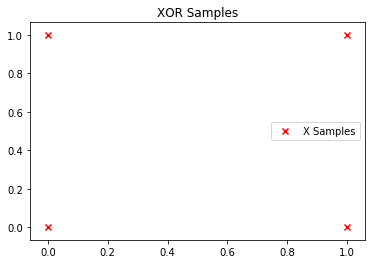

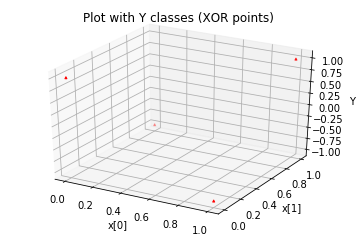

In [32]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# x1, x2, x3, x4
X = np.matrix([[1,1], [0,0], [1,0], [0,1]])
# y1, y2, y3, y4
Y = np.array([[1], [1], [-1], [-1]])

print('X: \n',X.T)
print('Y: \n',Y.T)
plt.scatter(np.array(X[:,0]).flatten(), np.array(X[:,1]).flatten(), color = 'r',marker='x', label = 'X Samples')
plt.legend()    
plt.title('XOR Samples')
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(X[:,0]).flatten(), np.array(X[:,1]).flatten(), np.array(Y[:,0]).flatten(), s=int(Y.shape[0]), c='r', marker='^')
ax.set_title('Plot with Y classes (XOR points)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('Y')
plt.show()

#### (b) Implement a network to estimate the function that is generating these samples.

- Wh & Wz are the weight matrices, of dimension previous layer size * next layer size.
- X is the input matrix, dimension 4 * 2 = all combinations of 2 truth values.
- Y is the corresponding target value of XOR of the 4 pairs of values in X.
- Z is the vector of learned values for XOR.

###### Comment on how you choose your parameters.

- Since the input data comprises 2 operands for the XOR operation, the input layer devotes 1 neuron per operand. 
- The result of the XOR operation is one truth value, so we have one output node. 
- The hidden layer can have any number of nodes, 3 seems sufficient
- Initialise the weights. Setting them all to the same value, e.g. zero, would be a poor choice because the weights are very likely to end up different from each other


In [99]:
# Number of iterations
epochs = 6000           
# Network Layer paramaeters 
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1

# Multiplication elemtwise
def elmult(el1, el2): 
    out = np.zeros(el1.shape)
    print('A->',el1.shape)
    print('B->',el2.shape)
    for i in range(el1.shape[0]):
        for j in range(el1.shape[1]):
            print(i,j, ' -> ', el1[0][0])
            x = float(el1[i][j])
            y = float(el2[i][j])
            print( x, ' ', y)
            out[i][j] = x * y
    return out

def sigmoid (x): return 1/(1 + np.exp(-x))      # activation function
def sigmoid_(sigma): return elmult(sigma, (1 - sigma))           # derivative of sigmoid

# weights on layer inputs
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

for i in range(epochs):
    # Layer computations
    H = sigmoid(np.dot(X, Wh))                  # hidden layer results activated 
    #print('H:',H)
    Z = sigmoid(np.dot(H, Wz))                  # output layer results activated 
    E = Y - Z                                   # error w.r.t labels Y
    
    # Deltas
    print(H, H.flatten())
    H = H.flatten()[0].reshape(H.shape)
    print(H)
    print(sigmoid_(H))
    dZ = elmult(E, sigmoid_(Z))                        # delta Z - change factor
    dH = np.dot(dZ, Wz.T) * sigmoid_(H)             # delta H - dH is dZ backpropagated through the weights Wz, amplified by the slope of H
    # Updates
    Wz +=  H.T.dot(dZ)                          # update output layer weights
    Wh +=  X.T.dot(dH)                          # update hidden layer weights
    
    #print(Wh.shape)
    
print(Z)                # what have we learnt?


def val_prediction():
    y_out = np.array([0,0,0,0])
    for i in range(4):
        print('Test: X ->',X[i,:])
        y_out[i] = np.dot((np.dot(X[i,:],Wh)),Wz)
        print(y_out[i])

val_prediction()

[[0.83658353 0.83410865 0.84281804]
 [0.5        0.5        0.5       ]
 [0.69345711 0.70792379 0.70414493]
 [0.69353384 0.67474141 0.69258504]] [[0.83658353 0.83410865 0.84281804 0.5        0.5        0.5
  0.69345711 0.70792379 0.70414493 0.69353384 0.67474141 0.69258504]]
[[0.83658353 0.83410865 0.84281804]
 [0.5        0.5        0.5       ]
 [0.69345711 0.70792379 0.70414493]
 [0.69353384 0.67474141 0.69258504]]
A-> (4, 3)
B-> (4, 3)
0 0  ->  [[0.83658353 0.83410865 0.84281804]]


TypeError: only size-1 arrays can be converted to Python scalars